In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
import pickle
from src.mc.MonteCarlo import MonteCarlo
from src.mc.MC import MC_set
from src.mc.shape_ext import shape_generator
from src.utils import tools as fg
from tensorflow import keras

In [3]:
pred_ch0 = np.load("../model_predictions/sh06x2/unetPP2481632_sh06x2_ch0__bs_512_m_1280_mse_lr_1e-4_150_DROPOUT0.npy")
pred_ch1 = np.load("../model_predictions/sh06x2/unetPP2481632_sh06x2_ch1__bs_512_m_1280_mse_lr_1e-4_150_DROPOUT0.npy")

In [4]:
pred_ch0 = pred_ch0.reshape(pred_ch0.shape[0], pred_ch0.shape[1])
pred_ch1 = pred_ch1.reshape(pred_ch1.shape[0], pred_ch1.shape[1])

In [5]:
corr_file_path = "../DATASETS/sh06x2/lab_ch0_1_shapes_test_CORR_pattern_50"
ch0_path = "../DATASETS/sh06x2/lab_shapes_test_CH0_ind_50"
ch1_path = "../DATASETS/sh06x2/lab_shapes_test_CH1_ind_50"

In [6]:
with open(corr_file_path, "rb") as f_cor:
    cor_f = pickle.load(f_cor)

In [7]:
with open(ch0_path, "rb") as f_ch0:
    ch0_f = pickle.load(f_ch0)
    

In [8]:
with open(ch1_path, "rb") as f_ch1:
    ch1_f = pickle.load(f_ch1)

In [9]:
def sub_list_to_list(x0):
    x = [item for sublist in x0 for item in sublist]
    return x

In [10]:
cor_ar = np.array(sub_list_to_list(np.array(cor_f)))
ch0_ar = np.array(sub_list_to_list(np.array(ch0_f)))
ch1_ar = np.array(sub_list_to_list(np.array(ch1_f)))

In [11]:
print(cor_ar.shape, ch0_ar.shape, ch1_ar.shape)

(960,) (960,) (960,)


In [12]:
print(pred_ch0.shape, pred_ch1.shape)

(960, 256) (960, 256)


In [24]:
error_counts = []
for i in range(cor_ar.shape[0]):
    if len(cor_ar[i])==0:
        pass
    else:
        cor_ar1 = cor_ar[i]
        ch0_ar1 = ch0_ar[i]
        ch1_ar1 = ch1_ar[i]
        for j1,j2,j3 in zip(cor_ar1, ch0_ar1, ch1_ar1):
            
            if j1==1 and j2==j3:
                counts.append(pred_ch0[i][j2]-pred_ch1[i][j2])

### Plot of prediction error between correlated pulses of two channels

(array([4.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 6.000e+00,
        2.200e+01, 4.800e+01, 9.800e+01, 1.720e+02, 2.760e+02, 4.600e+02,
        7.280e+02, 1.260e+03, 2.632e+03, 8.426e+03, 7.918e+03, 2.338e+03,
        1.328e+03, 7.720e+02, 4.480e+02, 2.360e+02, 1.480e+02, 8.600e+01,
        2.800e+01, 1.200e+01, 1.200e+01, 6.000e+00, 4.000e+00, 1.000e+01]),
 array([-2.5021522e+00, -2.3456919e+00, -2.1892319e+00, -2.0327716e+00,
        -1.8763113e+00, -1.7198511e+00, -1.5633910e+00, -1.4069307e+00,
        -1.2504705e+00, -1.0940102e+00, -9.3755007e-01, -7.8108984e-01,
        -6.2462962e-01, -4.6816942e-01, -3.1170923e-01, -1.5524900e-01,
         1.2112141e-03,  1.5767142e-01,  3.1413165e-01,  4.7059184e-01,
         6.2705207e-01,  7.8351229e-01,  9.3997252e-01,  1.0964327e+00,
         1.2528930e+00,  1.4093531e+00,  1.5658133e+00,  1.7222736e+00,
         1.8787338e+00,  2.0351939e+00,  2.1916542e+00], dtype=float32),
 <BarContainer object of 30 artists>)

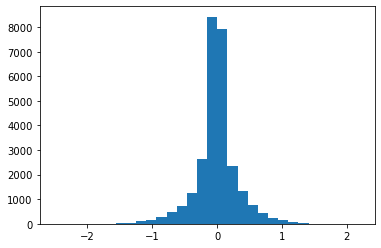

In [25]:
import matplotlib.pyplot as plt
plt.hist(counts, bins=30)